# Importing libraries and reading CSV files

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spray = pd.read_csv ('./predict-west-nile-virus/spray.csv')

| Feature                | File  | Description                                                                                                 |
|------------------------|-------|-------------------------------------------------------------------------------------------------------------|
| Date                   | Spray | date that the WNV test is performed|
| Time                   | Spray |                        |        
| Latitude               | Spray | the species of mosquitos|
| Longitude              | Spray | block number of address                                                       


In [3]:
spray.columns = spray.columns.map(lambda x: x.lower())

In [4]:
spray.columns

Index(['date', 'time', 'latitude', 'longitude'], dtype='object')

In [5]:
spray.shape

(14835, 4)

In [6]:
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

In [7]:
spray.head()

,date,time,latitude,longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


Generally, We can see that there are multiple entries for a single day

In [8]:
spray[spray.duplicated()].shape

(541, 4)

There are 541 duplicates observations, we need to investigate them throughtly to make decisions on how to handle them

### Longitude & Latitude

In [9]:
spray_duplicates = spray.groupby(['latitude', 'longitude'], as_index=False).count().sort_values('date', ascending=False)
spray_duplicates

,latitude,longitude,date,time
11853,41.986460,-87.794225,541,541
11499,41.983917,-87.793088,2,2
0,41.713925,-87.615892,1,1
9533,41.959113,-87.719752,1,1
9522,41.959028,-87.728890,1,1
...,...,...,...,...
4767,41.894337,-87.714500,1,1
4768,41.894343,-87.760688,1,1
4769,41.894380,-87.772148,1,1
4770,41.894402,-87.704128,1,1


it seems that there is 540 duplicates and 1 duplicate (while retaining 1 original data) 

After investigating, the duplicates are suspected to be error in data entry as it makes no logical sense why there are multiple entries of the same data and time of the spray done at the same location. hence, dropping the 540 & 1 duplicates

In [10]:
spray[spray.duplicated()].shape

(541, 4)

In [11]:
# keeping one entry and removing the remaining 540 and 1 duplicate
spray = spray[spray.duplicated(subset=['date','latitude','longitude','time'])==False]
spray.shape

(14294, 4)

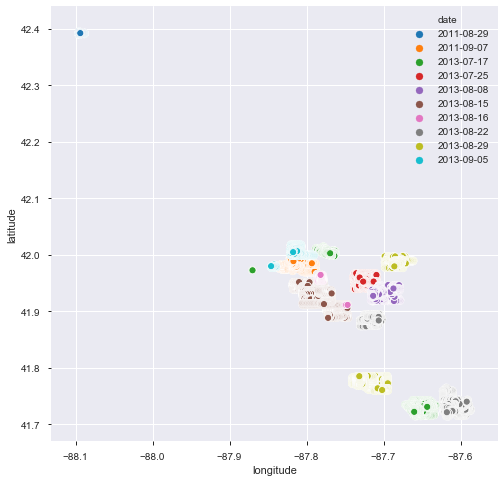

In [14]:
X= spray['longitude']
y = spray['latitude']

plt.figure(figsize=(8,8))
sns.scatterplot(X,y,hue=spray['date'])

### Time

In [15]:
spray.drop('time', axis=1, inplace=True)

Dropping time since we cannot impute anything value after considering how to make sense of the missing time data

### Date

In [17]:
print(np.unique(spray['date']))
spray['date'].value_counts()

['2011-08-29' '2011-09-07' '2013-07-17' '2013-07-25' '2013-08-08'
 '2013-08-15' '2013-08-16' '2013-08-22' '2013-08-29' '2013-09-05']


2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2013-07-25    1607
2013-08-22    1587
2011-09-07    1573
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: date, dtype: int64

Spray was done on 2 days in 2011 and 8 days in 2013

In [18]:
spray['date'] = spray['date'].str.split('-')
spray['date']

0        [2011, 08, 29]
1        [2011, 08, 29]
2        [2011, 08, 29]
3        [2011, 08, 29]
4        [2011, 08, 29]
              ...      
14830    [2013, 09, 05]
14831    [2013, 09, 05]
14832    [2013, 09, 05]
14833    [2013, 09, 05]
14834    [2013, 09, 05]
Name: date, Length: 14294, dtype: object

In [19]:
spray['year'] = [y[0] for y in spray['date']]
spray['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
14830    2013
14831    2013
14832    2013
14833    2013
14834    2013
Name: year, Length: 14294, dtype: object

In [20]:
spray['month'] = [y[1] for y in spray['date']]
spray['month']

0        08
1        08
2        08
3        08
4        08
         ..
14830    09
14831    09
14832    09
14833    09
14834    09
Name: month, Length: 14294, dtype: object

In [21]:
spray['day'] = [y[2] for y in spray['date']]
spray['day']

0        29
1        29
2        29
3        29
4        29
         ..
14830    05
14831    05
14832    05
14833    05
14834    05
Name: day, Length: 14294, dtype: object

In [22]:
spray.head()

,date,latitude,longitude,year,month,day
0,"[2011, 08, 29]",42.391623,-88.089163,2011,08,29
1,"[2011, 08, 29]",42.391348,-88.089163,2011,08,29
2,"[2011, 08, 29]",42.391022,-88.089157,2011,08,29
3,"[2011, 08, 29]",42.390637,-88.089158,2011,08,29
4,"[2011, 08, 29]",42.390410,-88.088858,2011,08,29
